In [2]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [3]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [4]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

In [5]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)
listResult = list()

In [6]:
modelsName = c("*fourier*", "*wavelets*", "*ssa*", "*emdrp*", 
               #"*emdmi*", 
               "*forcedec*", "*forcedectopo*")
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

pdf 
  2

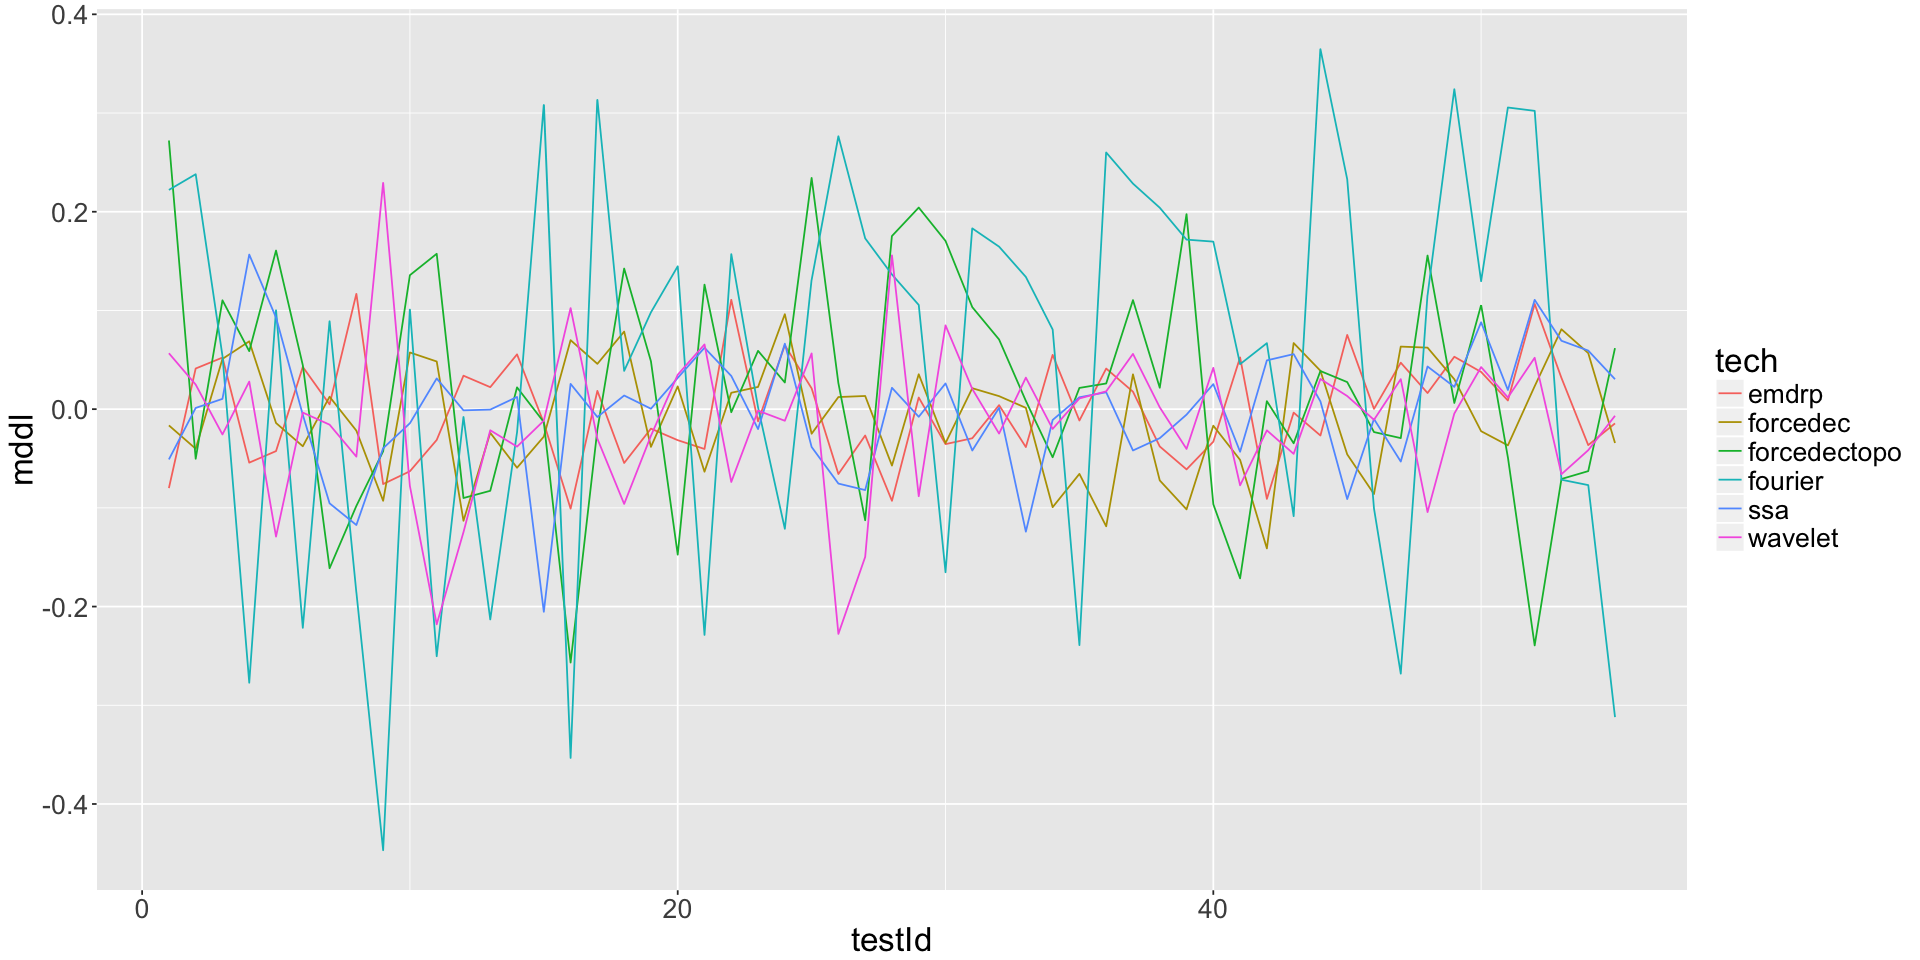

In [7]:

data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

pdf 
  2

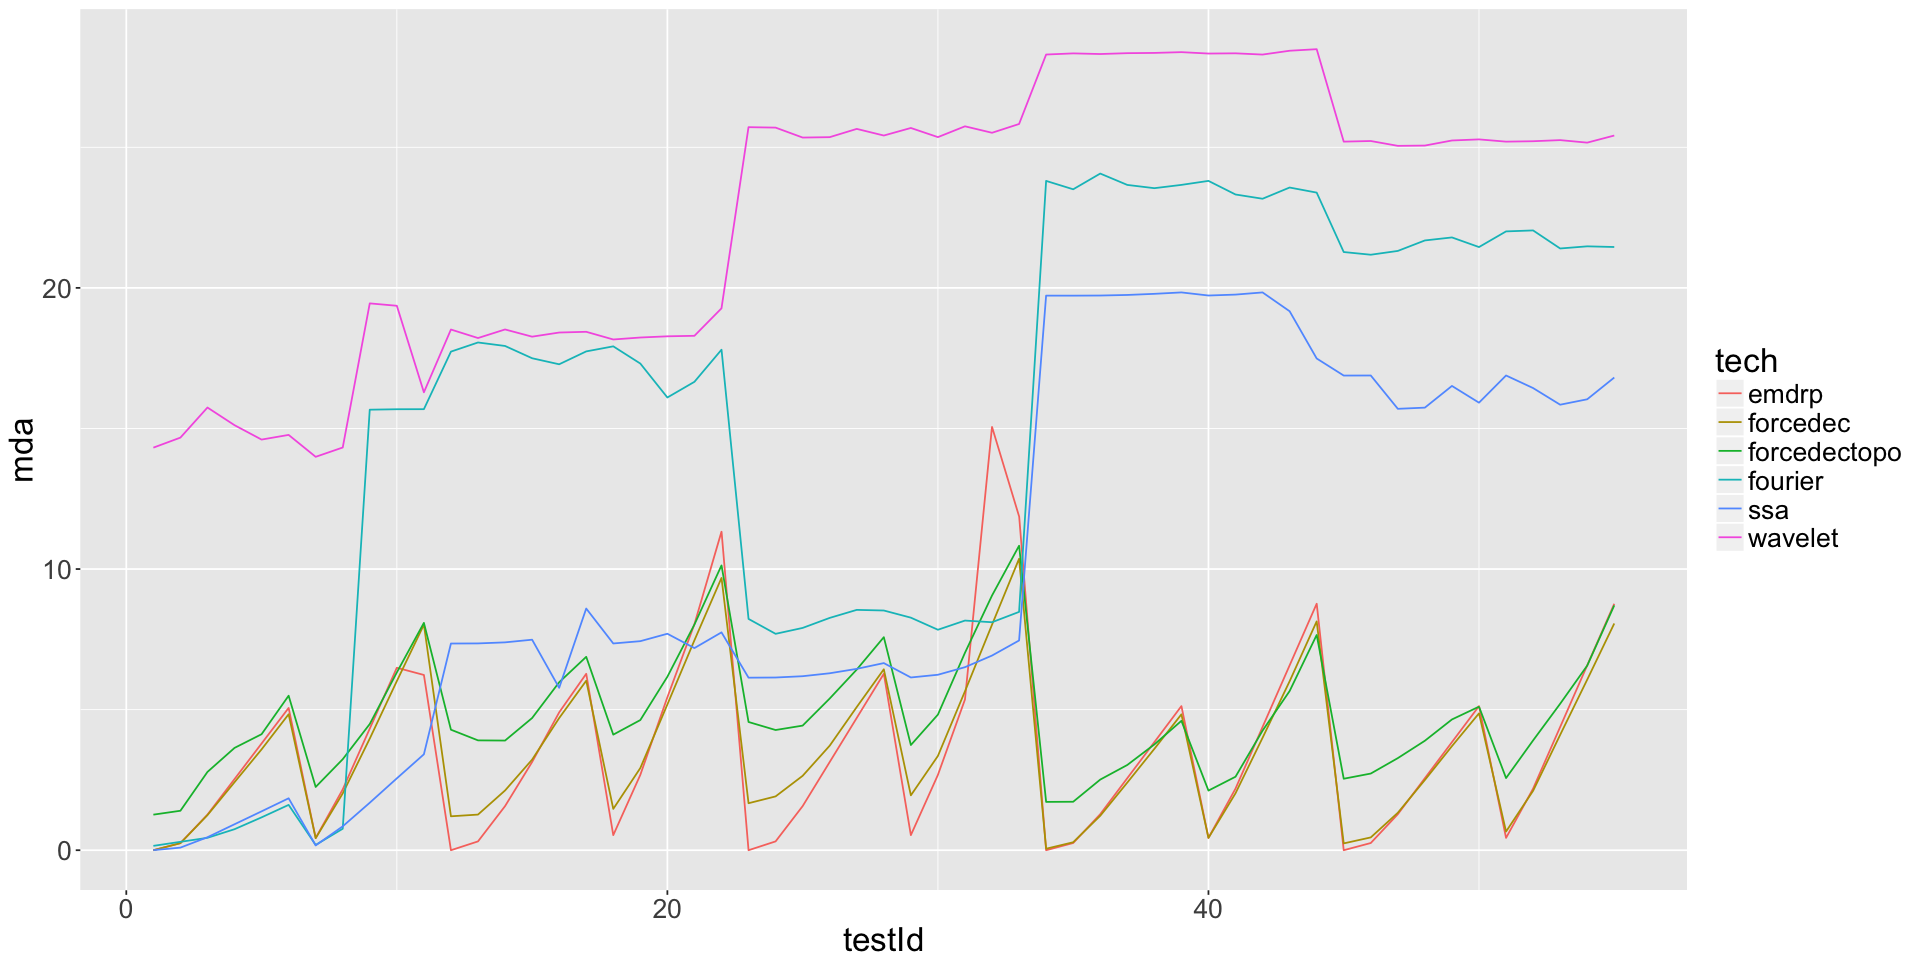

In [8]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

pdf 
  2

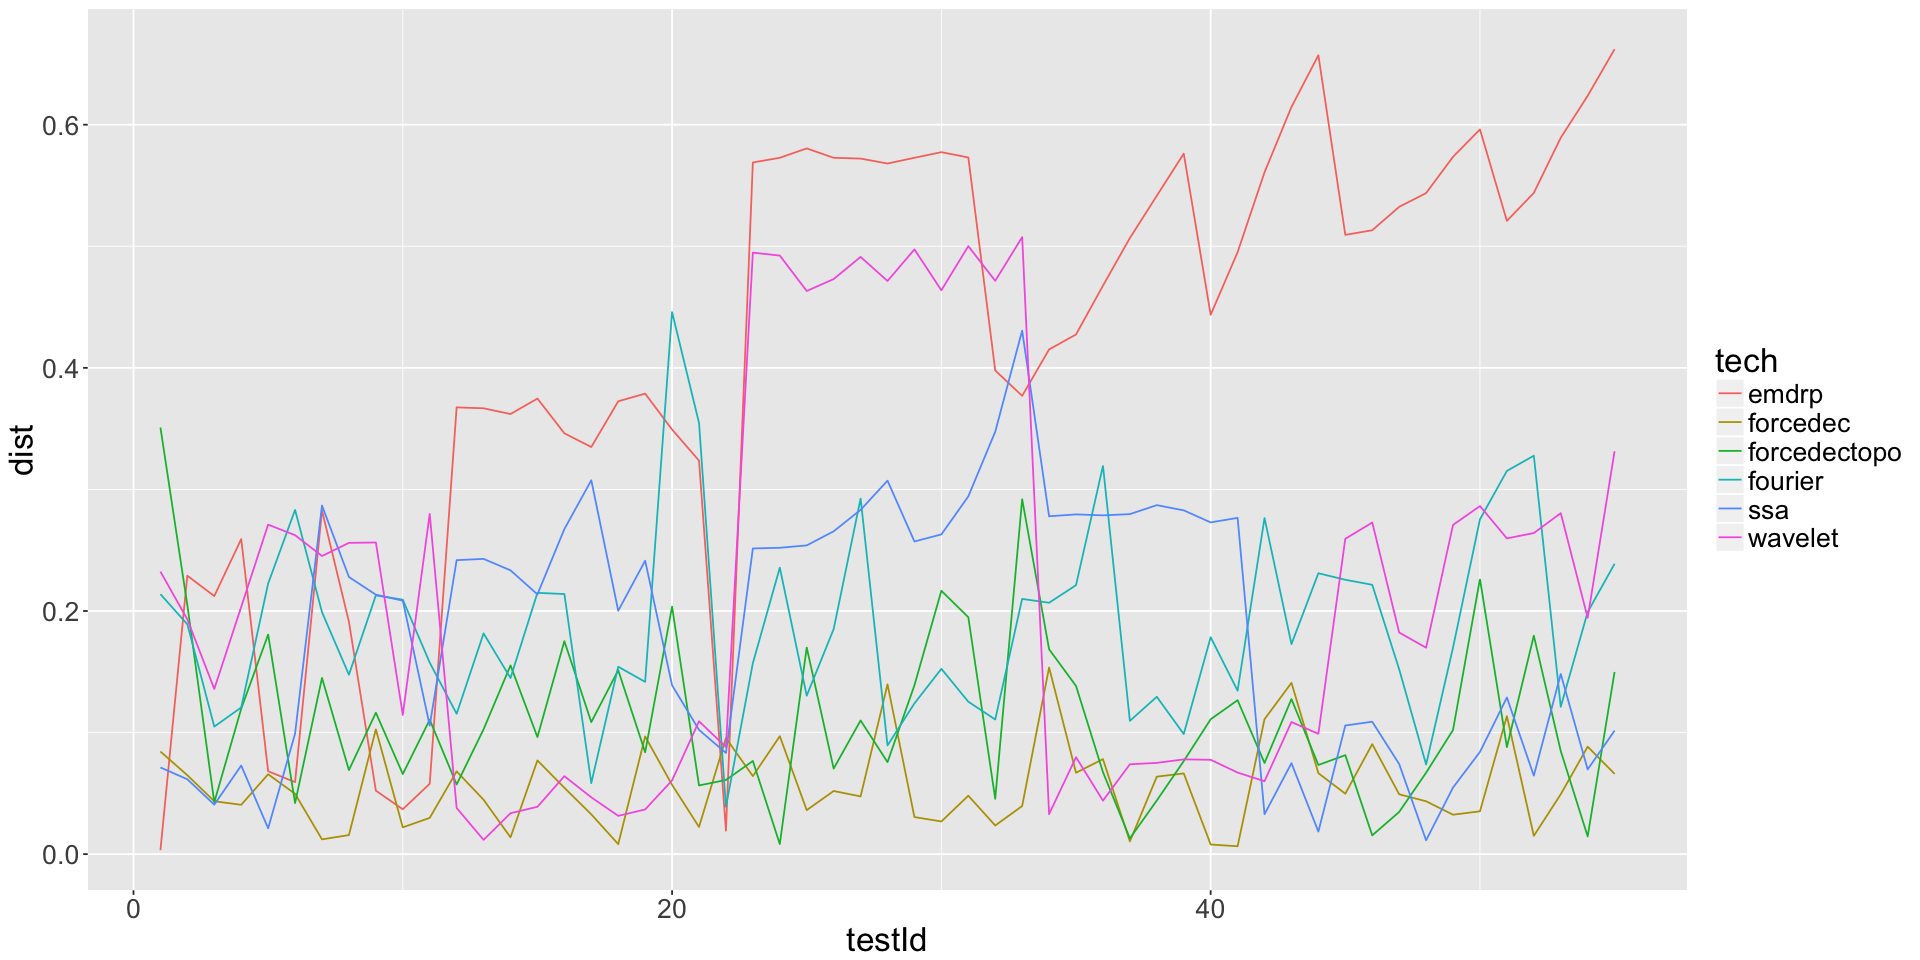

In [9]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
p = ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_line() + theme(text = element_text(size=20))
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist.pdf", sep='/'), width=16, height=5)

pdf 
  2

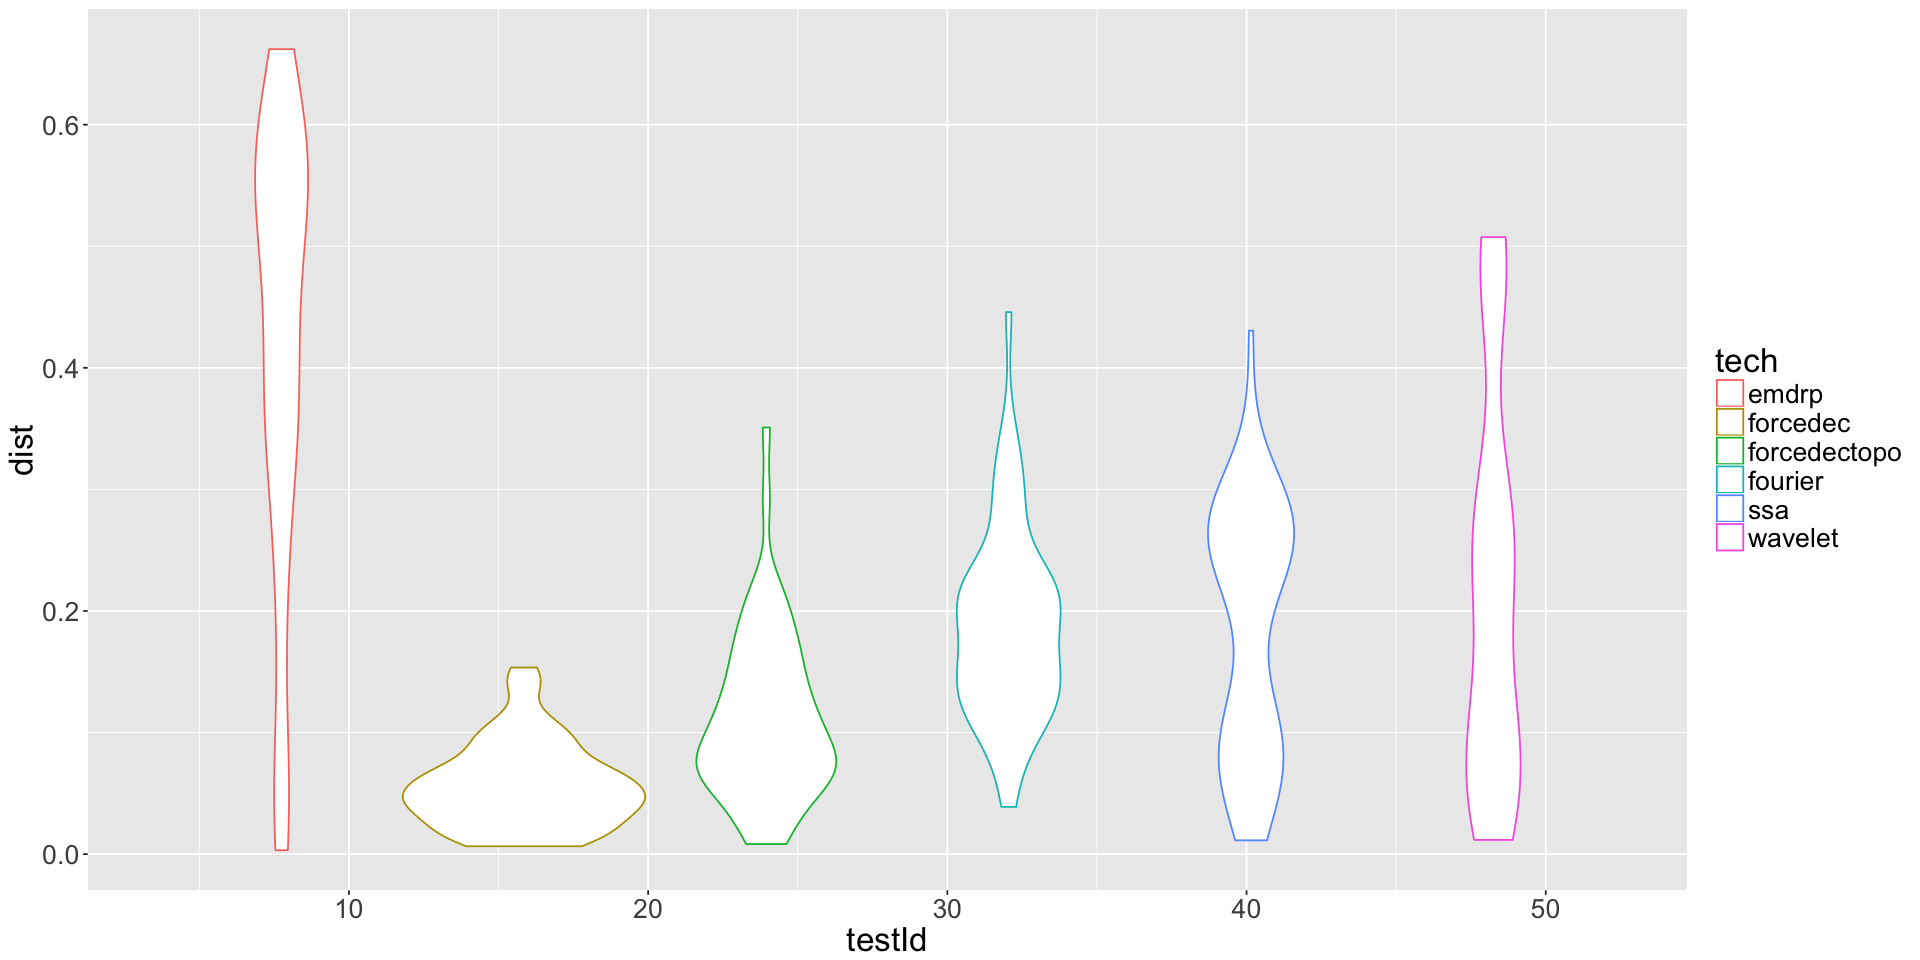

In [10]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)